### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интелекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

##### Студент:  Щербак Маргарита Романовна
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант №18

1. Набор данных dtd с изменением разрешения до 80x96

2. Классы с метками 1,13,25,36

3. Требования к архитектуре сети MLP:

- Последовательный API с методом add() при создании

 - Функция потерь: разреженная категориальная кросс-энтропия

 - Кол-во скрытых слоев 4

 - Кол-во нейронов 70 в каждом нечетном скрытом слое, 90 в каждом четном скрытом слое

 - Использование слоев dropout

4. Требования к архитектуре сети CNN:

 - Функциональный API при создании

 - Функция потерь: категориальная кросс-энтропия

 - Кол-во сверточных слоев 5

 - Количество фильтров в сверточных слоях 8

 - Размеры фильтра 2х2

 - Использование слоев с регуляризацией L1L2

5. Требования к архитектуре сети RNN:

 - Последовательный API со списком слоев при создании

 - Функция потерь: разреженная категориальная кросс-энтропия

 - Слой LSTM с 96 нейронами

 - Использование слоев пакетной нормализации

6. Показатель качества многоклассовой классификации:

 - минимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу.



Загрузила нужные библиотеки для начала

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps
import random
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import OneHotEncoder

**Задание 1**   
Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.  

In [ ]:
ds, info = tfds.load("dtd", split=['train','test'], with_info=True)
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1880 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/dtd/incomplete.IHX1BW_3.0.1/dtd-train.tfrecord*...:   0%|          | 0/188…

Generating test examples...:   0%|          | 0/1880 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/dtd/incomplete.IHX1BW_3.0.1/dtd-test.tfrecord*...:   0%|          | 0/1880…

Generating validation examples...:   0%|          | 0/1880 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/dtd/incomplete.IHX1BW_3.0.1/dtd-validation.tfrecord*...:   0%|          | …

Dataset dtd downloaded and prepared to /root/tensorflow_datasets/dtd/3.0.1. Subsequent calls will reuse this data.


In [ ]:
df_train.shape, df_test.shape

((1880, 3), (1880, 3))

In [ ]:
df_train.iloc[0]['image'].shape

(300, 400, 3)

In [ ]:
# Разделение на обучающую и валидационную выборки
test_data, validation_data = train_test_split(df_test, test_size=0.4, random_state=42)

df_test = pd.DataFrame(test_data)
df_validation = pd.DataFrame(validation_data)

df_train.shape, df_test.shape, df_validation.shape

((1880, 3), (1128, 3), (752, 3))

In [ ]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
validation_labels = df_validation['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape, validation_labels.shape

((1880,), (1128,), (752,))

In [ ]:
# с изменением разрешения
train_images = np.zeros(shape=(df_train.shape[0],80,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],80,96,3), dtype=np.float32)
validation_images  = np.zeros(shape=(df_validation.shape[0],80,96,3), dtype=np.float32)
train_images.shape, test_images.shape, validation_images.shape

((1880, 80, 96, 3), (1128, 80, 96, 3), (752, 80, 96, 3))

In [ ]:
for idx in range(train_labels.shape[0]):
    resized_image = Image.fromarray(df_train.iloc[idx]['image']).resize((96, 80))
    train_images[idx, :, :, :] = np.array(resized_image)

for idx in range(test_labels.shape[0]):
    resized_image = Image.fromarray(df_test.iloc[idx]['image']).resize((96, 80))
    test_images[idx, :, :, :] = np.array(resized_image)

for idx in range(validation_labels.shape[0]):
    resized_image = Image.fromarray(df_validation.iloc[idx]['image']).resize((96, 80))
    validation_images[idx, :, :, :] = np.array(resized_image)

print(train_images.shape, test_images.shape, validation_images.shape)

(1880, 80, 96, 3) (1128, 80, 96, 3) (752, 80, 96, 3)


In [ ]:
train_images /= 255
test_images  /= 255
validation_images  /= 255

**Задание 2**  
Оставьте в наборе изображения, указанные в индивидуальном задании, и визуализируйте несколько изображений.

In [ ]:
print("Метки классов train:", np.unique(train_labels))
print("Метки классов test:", np.unique(test_labels))
print("Метки классов validation:", np.unique(validation_labels))

Метки классов train: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]
Метки классов test: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]
Метки классов validation: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.]


In [ ]:

def display_images_separately(images, labels, num_images_per_label=5):
    unique_labels = np.unique(labels)
    num_cols = 6  # количество колонок
    num_rows = len(unique_labels)  # количество строк
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 2))

    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    for row, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0]
        selected_indices = label_indices[:num_images_per_label]

        for col, idx in enumerate(selected_indices):
            img = images[idx]
            ax = axes[row, col]
            ax.imshow(img)
            ax.set_title(f'Label: {label}')
            ax.axis('off')

        for col in range(len(selected_indices), num_cols):
            ax = axes[row, col]
            # ax.axis('off')

    plt.tight_layout()
    plt.show()

# display_images_separately(train_images, train_labels, num_images_per_label=6)

С метками, которые указаны у меня в индивидуальном задании, нейронные сети очень плохо обучались, потому что если
посмотреть, например, на картинки класса с меткой 13, то там одна картинка - лицо человека, а другая - это цветок, а в классе с
меткой 36 одна картинка просто светло-оранжевого цвета, а другая с посыпкой для глазури, которая на шапке кулича. Я бы сама
никогда не сказала, что эти картинки находятся в одном классе. Поэтому взяла данные из классов с другими метками, где картинки
действительно друг на друга похожи. После чего мои модели стали показывать результат.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Фильтрация данных для классов
train_mask = df_train['label'].isin([5, 39, 45, 46])
test_mask = df_test['label'].isin([5, 39, 45, 46])
validation_mask = df_validation['label'].isin([5, 39, 45, 46])

df_train_filtered = df_train.loc[train_mask].copy()
df_test_filtered = df_test.loc[test_mask].copy()
df_validation_filtered = df_validation.loc[validation_mask].copy()

# Преобразование меток классов
label_map = {5: 0, 39: 1, 45: 2, 46: 3}
df_train_filtered['label'] = df_train_filtered['label'].map(label_map)
df_test_filtered['label'] = df_test_filtered['label'].map(label_map)
df_validation_filtered['label'] = df_validation_filtered['label'].map(label_map)

# Преобразование меток классов в one-hot формат
train_labels = to_categorical(df_train_filtered['label'], num_classes=4)
test_labels = to_categorical(df_test_filtered['label'], num_classes=4)
validation_labels = to_categorical(df_validation_filtered['label'], num_classes=4)

# Конвертация изображений и меток в numpy массивы
train_images = np.zeros(shape=(df_train_filtered.shape[0], 80, 96, 3), dtype=np.float32)
test_images = np.zeros(shape=(df_test_filtered.shape[0], 80, 96, 3), dtype=np.float32)
validation_images = np.zeros(shape=(df_validation_filtered.shape[0], 80, 96, 3), dtype=np.float32)

# Изменение размера изображений и их сохранение в массивы
for idx in range(df_train_filtered.shape[0]):
    resized_image = Image.fromarray(df_train_filtered.iloc[idx]['image']).resize((96, 80))
    train_images[idx] = np.array(resized_image)

for idx in range(df_test_filtered.shape[0]):
    resized_image = Image.fromarray(df_test_filtered.iloc[idx]['image']).resize((96, 80))
    test_images[idx] = np.array(resized_image)

for idx in range(df_validation_filtered.shape[0]):
    resized_image = Image.fromarray(df_validation_filtered.iloc[idx]['image']).resize((96, 80))
    validation_images[idx] = np.array(resized_image)

# Нормализация изображений
train_images /= 255.0
test_images /= 255.0
validation_images /= 255.0

print("Данные успешно подготовлены и нормализованы")

Данные успешно подготовлены и нормализованы


In [ ]:
train_images.shape, test_images.shape, validation_images.shape

((160, 80, 96, 3), (103, 80, 96, 3), (57, 80, 96, 3))

In [ ]:
# Определение уникальных классов
unique_train_labels = np.unique(np.argmax(train_labels, axis=1))
unique_test_labels = np.unique(np.argmax(test_labels, axis=1))
unique_validation_labels = np.unique(np.argmax(validation_labels, axis=1))

print("Уникальные классы train:", unique_train_labels)
print("Уникальные классы test:", unique_test_labels)
print("Уникальные классы validation:", unique_validation_labels)

Уникальные классы train: [0 1 2 3]
Уникальные классы test: [0 1 2 3]
Уникальные классы validation: [0 1 2 3]


Визуализация картинок из классов с выбранными мной метками.

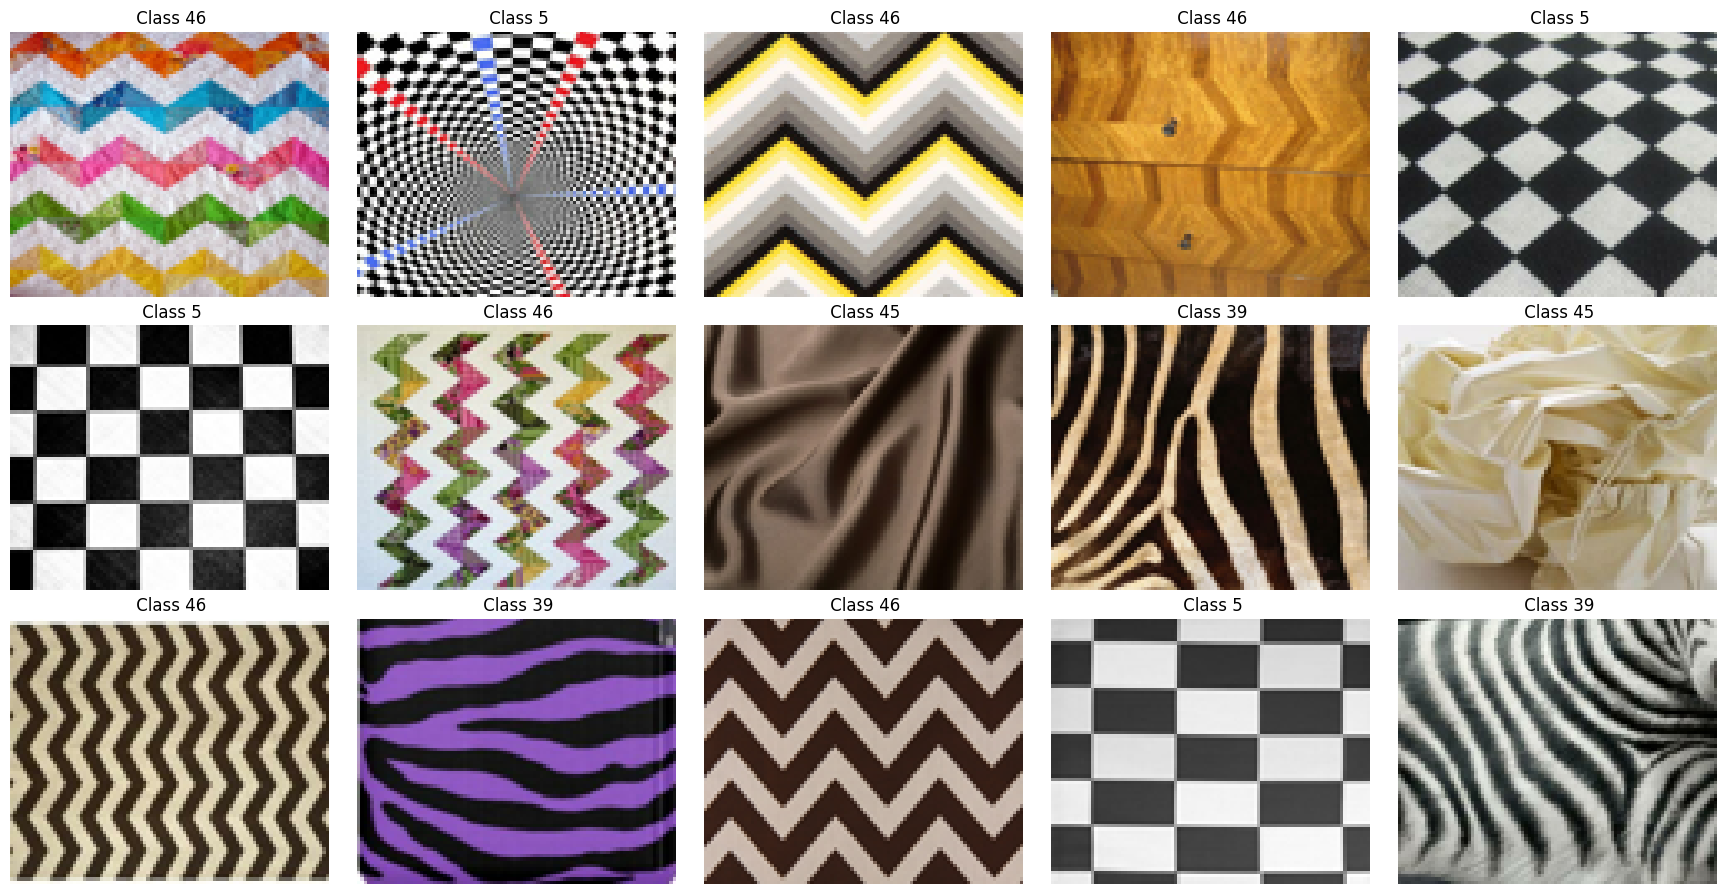

In [ ]:
import random
reverse_label_map = {v: k for k, v in label_map.items()}

def plot_random_sample(images, labels, class_names):
    n = 15
    indices = random.sample(range(len(images)), n)
    imgs = [images[i] for i in indices]
    img_labels = [labels[i] for i in indices]
    num_row = 3
    num_col = 5
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))

    for i in range(num_row * num_col):
        img = imgs[i]
        label = img_labels[i]
        class_index = np.argmax(label)
        class_name = class_names[class_index]
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        ax.set_title(f" {class_name}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

class_names = [f'Class {reverse_label_map[i]}' for i in range(4)]
plot_random_sample(test_images, test_labels, class_names)

## Задание 3

Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения.

Требования к архитектуре сети MLP:

- Последовательный API с методом add() при создании

 - Функция потерь: разреженная категориальная кросс-энтропия

 - Кол-во скрытых слоев 4

 - Кол-во нейронов 70 в каждом нечетном скрытом слое, 90 в каждом четном скрытом слое

 - Использование слоев dropout

In [ ]:
# Переводим метки из one-hot encoding в целые числа для loss=tf.keras.losses.SparseCategoricalCrossentropy()
train_labels_int = np.argmax(train_labels, axis=1)
test_labels_int = np.argmax(test_labels, axis=1)
validation_labels_int = np.argmax(validation_labels, axis=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Создание модели MLP
model_mlp = Sequential()
model_mlp.add(Input(shape=(80, 96, 3)))
model_mlp.add(Flatten())
model_mlp.add(Dense(70, activation='tanh'))
model_mlp.add(Dropout(0.1))
model_mlp.add(Dense(90, activation='tanh'))
model_mlp.add(Dropout(0.1))
model_mlp.add(Dense(70, activation='tanh'))
model_mlp.add(Dropout(0.1))
model_mlp.add(Dense(90, activation='tanh'))
model_mlp.add(Dense(4, activation='softmax'))

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Компиляция модели
model_mlp.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Обучение модели
history_mlp = model_mlp.fit(
    train_images, train_labels_int,
    epochs=50,
    batch_size=128,
    validation_data=(validation_images, validation_labels_int),
    callbacks=[early_stopping]
)

print(f"MLP модель обучалась {len(history_mlp.history['loss'])} эпох.")


Epoch 1/50
5/5 [==============================] - 2s 137ms/step - loss: 1.5254 - accuracy: 0.2500 - val_loss: 1.3828 - val_accuracy: 0.2812
Epoch 2/50
5/5 [==============================] - 0s 53ms/step - loss: 1.4498 - accuracy: 0.2750 - val_loss: 1.3653 - val_accuracy: 0.3063
Epoch 3/50
5/5 [==============================] - 0s 47ms/step - loss: 1.4050 - accuracy: 0.3250 - val_loss: 1.3452 - val_accuracy: 0.3313
Epoch 4/50
5/5 [==============================] - 0s 53ms/step - loss: 1.4434 - accuracy: 0.2562 - val_loss: 1.3273 - val_accuracy: 0.3125
Epoch 5/50
5/5 [==============================] - 0s 74ms/step - loss: 1.4140 - accuracy: 0.2625 - val_loss: 1.3124 - val_accuracy: 0.3750
Epoch 6/50
5/5 [==============================] - 0s 54ms/step - loss: 1.3714 - accuracy: 0.3125 - val_loss: 1.2894 - val_accuracy: 0.4437
Epoch 7/50
5/5 [==============================] - 0s 39ms/step - loss: 1.3910 - accuracy: 0.3625 - val_loss: 1.2745 - val_accuracy: 0.4437
Epoch 8/50
5/5 [==========

Требования к архитектуре сети CNN:

 - Функциональный API при создании

 - Функция потерь: категориальная кросс-энтропия

 - Кол-во сверточных слоев 5

 - Количество фильтров в сверточных слоях 8

 - Размеры фильтра 2х2

 - Использование слоев с регуляризацией L1L2

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Преобразование меток в one-hot формат для категориальной кросс-энтропии
train_labels_categorical = tf.keras.utils.to_categorical(train_labels, num_classes=4)
validation_labels_categorical = tf.keras.utils.to_categorical(validation_labels, num_classes=4)

input_shape = (80, 96, 3)
inputs = Input(shape=input_shape)
x = Conv2D(8, (2, 2), activation='tanh', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(inputs)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)

x = Conv2D(8, (2, 2), activation='tanh', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)

x = Conv2D(8, (2, 2), activation='tanh', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)

x = Conv2D(8, (2, 2), activation='tanh', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)

x = Conv2D(8, (2, 2), activation='tanh', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)

cnn_model = Model(inputs=inputs, outputs=outputs)

# Компиляция модели с категориальной кросс-энтропией
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

history_cnn = cnn_model.fit(
    train_images, train_labels_categorical,
    epochs=100,
    batch_size=128,
    validation_data=(validation_images, validation_labels_categorical),
    callbacks=[early_stopping]
)

print(f"CNN модель обучалась {len(history_cnn.history['loss'])} эпох.")


Epoch 1/100
2/2 [==============================] - 1s 287ms/step - loss: 1.5020 - accuracy: 0.2438 - val_loss: 1.4442 - val_accuracy: 0.2875
Epoch 2/100
2/2 [==============================] - 0s 80ms/step - loss: 1.4370 - accuracy: 0.2438 - val_loss: 1.4058 - val_accuracy: 0.2812
Epoch 3/100
2/2 [==============================] - 0s 129ms/step - loss: 1.4616 - accuracy: 0.2500 - val_loss: 1.3865 - val_accuracy: 0.3063
Epoch 4/100
2/2 [==============================] - 0s 136ms/step - loss: 1.4086 - accuracy: 0.2562 - val_loss: 1.3763 - val_accuracy: 0.3063
Epoch 5/100
2/2 [==============================] - 0s 155ms/step - loss: 1.3976 - accuracy: 0.2937 - val_loss: 1.3727 - val_accuracy: 0.2625
Epoch 6/100
2/2 [==============================] - 0s 146ms/step - loss: 1.3973 - accuracy: 0.3125 - val_loss: 1.3586 - val_accuracy: 0.3375
Epoch 7/100
2/2 [==============================] - 0s 123ms/step - loss: 1.3800 - accuracy: 0.3250 - val_loss: 1.3571 - val_accuracy: 0.3063
Epoch 8/100
2/

 Требования к архитектуре сети RNN:

 - Последовательный API со списком слоев при создании

 - Функция потерь: разреженная категориальная кросс-энтропия

 - Слой LSTM с 96 нейронами

 - Использование слоев пакетной нормализации

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, BatchNormalization, Dense, TimeDistributed, Flatten
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

# Перевели метки из one-hot encoding в целые числа для использования функции потерь SparseCategoricalCrossentropy()
train_labels_int = np.argmax(train_labels, axis=1)
test_labels_int = np.argmax(test_labels, axis=1)
validation_labels_int = np.argmax(validation_labels, axis=1)

# Создание модели RNN с последовательным API
model_rnn = Sequential([
    tf.keras.Input(shape=(80, 96, 3)),
    TimeDistributed(Flatten()),
    LSTM(96, return_sequences=False),
    BatchNormalization(),
    Dense(4, activation='softmax')
])

# Компиляция модели
model_rnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Обучение модели
history_rnn = model_rnn.fit(
    train_images, train_labels_int,
    epochs=100,
    batch_size=128,
    validation_data=(validation_images, validation_labels_int),
    callbacks=[early_stopping]
)

print(f"RNN модель обучалась {len(history_rnn.history['loss'])} эпох.")


Epoch 1/100
2/2 [==============================] - 9s 1s/step - loss: 1.8347 - accuracy: 0.2125 - val_loss: 1.4537 - val_accuracy: 0.2500
Epoch 2/100
2/2 [==============================] - 1s 329ms/step - loss: 1.4085 - accuracy: 0.4125 - val_loss: 1.4120 - val_accuracy: 0.2500
Epoch 3/100
2/2 [==============================] - 1s 275ms/step - loss: 1.1389 - accuracy: 0.4812 - val_loss: 1.3867 - val_accuracy: 0.2562
Epoch 4/100
2/2 [==============================] - 1s 271ms/step - loss: 0.9886 - accuracy: 0.6250 - val_loss: 1.3644 - val_accuracy: 0.2688
Epoch 5/100
2/2 [==============================] - 0s 271ms/step - loss: 0.9230 - accuracy: 0.6125 - val_loss: 1.3385 - val_accuracy: 0.2750
Epoch 6/100
2/2 [==============================] - 0s 267ms/step - loss: 0.8326 - accuracy: 0.6625 - val_loss: 1.3055 - val_accuracy: 0.3187
Epoch 7/100
2/2 [==============================] - 0s 249ms/step - loss: 0.7644 - accuracy: 0.7437 - val_loss: 1.2863 - val_accuracy: 0.3375
Epoch 8/100
2/2 

**Задание 4**  
Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством.  

Полнота — это доля истинно положительных классификаций. Полнота показывает, какую долю объектов, реально относящихся к положительному классу, мы предсказали верно. Полнота (recall) демонстрирует способность алгоритма обнаруживать данный класс вообще.

In [ ]:
from sklearn.metrics import recall_score

# Оценка полноты на тестовой выборке для MLP модели
mlp_predictions = np.argmax(model_mlp.predict(test_images), axis=-1)
mlp_recall = recall_score(test_labels_int, mlp_predictions, average=None)
mlp_test_loss, mlp_test_accuracy = model_mlp.evaluate(test_images, test_labels)
print(f"MLP модель на тестовой выборке:\n {mlp_test_accuracy}, ; {mlp_test_loss}")

# Оценка качества на тестовой выборке для CNN
cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=-1)
cnn_recall = recall_score(test_labels_int, cnn_predictions, average=None)
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"CNN модель на тестовой выборке:\n {cnn_test_accuracy}, ; {cnn_test_loss}")

# Оценка качества на тестовой выборке для RNN
rnn_predictions = np.argmax(model_rnn.predict(test_images), axis=-1)
rnn_recall = recall_score(test_labels_int, rnn_predictions, average=None)
rnn_test_loss, rnn_test_accuracy = model_rnn.evaluate(test_images, test_labels)
print(f"RNN модель на тестовой выборке:\n {rnn_test_accuracy}, ; {rnn_test_loss}")

# Выбор модели с минимальной полнотой
min_recall_mlp = np.min(mlp_recall)
min_recall_cnn = np.min(cnn_recall)
min_recall_rnn = np.min(rnn_recall)

In [ ]:
# Определение лучшей модели по минимальной полноте
best_model = None
best_min_recall = float('inf')
best_model_name = ""

if min_recall_mlp < best_min_recall:
    best_min_recall = min_recall_mlp
    best_model = model_mlp
    best_model_name = "MLP"

if min_recall_cnn < best_min_recall:
    best_min_recall = min_recall_cnn
    best_model = cnn_model
    best_model_name = "CNN"

if min_recall_rnn < best_min_recall:
    best_min_recall = min_recall_rnn
    best_model = model_rnn
    best_model_name = "RNN"

# Вывод архитектуры лучшей модели
print(f"Лучшая модель: {best_model_name}")
best_model.summary()


4/4 [==============================] - 0s 13ms/step - loss: 1.6153 - accuracy: 0.3010
MLP модель на тестовой выборке:
 0.3009708821773529, ; 1.6153204441070557
4/4 [==============================] - 0s 41ms/step - loss: 2.4678 - accuracy: 0.3398
CNN модель на тестовой выборке:
 0.33980581164360046, ; 2.4677586555480957
4/4 [==============================] - 0s 52ms/step - loss: 1.3400 - accuracy: 0.3495
RNN модель на тестовой выборке:
 0.34951457381248474, ; 1.3399982452392578
Лучшая модель: RNN
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 80, 96, 3)]       0         
                                                                 
 time_distributed_1 (TimeDi  (None, 80, 288)           0         
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)     

Модель RNN имеет наибольшую оценку (0.3495), что указывает на то, что она лучше остальных моделей в предсказании положительного класса. Следовательно, с точки зрения этой оценки, модель RNN является наилучшей.

**Задание 5**  
Визуализируйте кривые обучения трех построенных моделей для показателя потерь на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

In [ ]:
# Получение относительных потерь на валидационной выборке для каждой модели
relative_losses_mlp = [loss / history_mlp.history['val_loss'][0] for loss in history_mlp.history['val_loss']]
relative_losses_cnn = [loss / history_cnn.history['val_loss'][0] for loss in history_cnn.history['val_loss']]
relative_losses_rnn = [loss / history_rnn.history['val_loss'][0] for loss in history_rnn.history['val_loss']]

# Получение эпох обучения
epochs_mlp = range(1, len(history_mlp.history['val_loss']) + 1)
epochs_cnn = range(1, len(history_cnn.history['val_loss']) + 1)
epochs_rnn = range(1, len(history_rnn.history['val_loss']) + 1)

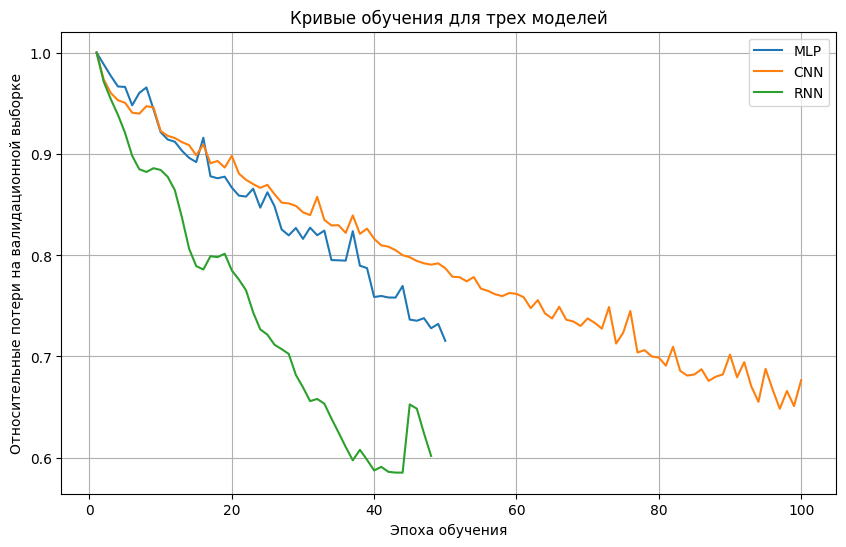

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epochs_mlp, relative_losses_mlp, label='MLP')
plt.plot(epochs_cnn, relative_losses_cnn, label='CNN')
plt.plot(epochs_rnn, relative_losses_rnn, label='RNN')
plt.title('Кривые обучения для трех моделей')
plt.xlabel('Эпоха обучения')
plt.ylabel('Относительные потери на валидационной выборке')
plt.legend()
plt.grid(True)
plt.show()

**Задание 6**  
Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

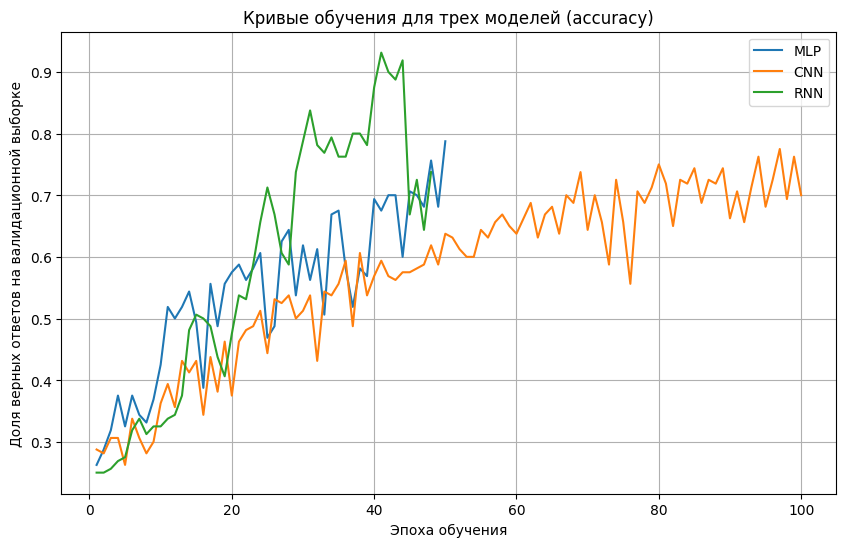

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epochs_mlp,  history_mlp.history['val_accuracy'], label='MLP')
plt.plot(epochs_cnn,  history_cnn.history['val_accuracy'], label='CNN')
plt.plot(epochs_rnn, history_rnn.history['val_accuracy'], label='RNN')
plt.title('Кривые обучения для трех моделей (accuracy)')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов на валидационной выборке')
plt.legend()
plt.grid(True)
plt.show()

**Задание 7**  
Используя модель нейронной сети с лучшей долей верных ответов на тестовой выборке, определите для каждого из классов два изображения в тестовой выборке, имеющие минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.

Лучшая нейронная сеть - RNN

4/4 [==============================] - 0s 54ms/step


<ipython-input-182-10f5f3d29c1a>:5: RuntimeWarning: invalid value encountered in multiply
  min_index = np.argmin(class_probabilities * (test_labels[:, class_index] == 1) + np.inf * (test_labels[:, class_index] == 0))


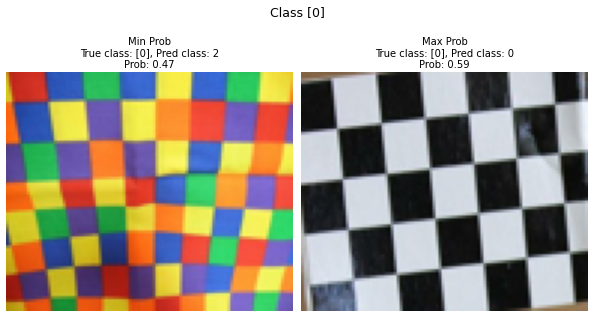

4/4 [==============================] - 0s 69ms/step


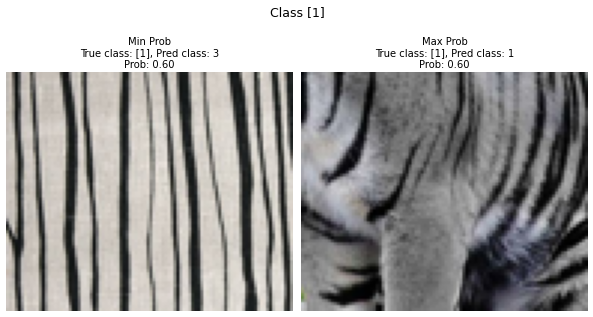

4/4 [==============================] - 0s 57ms/step


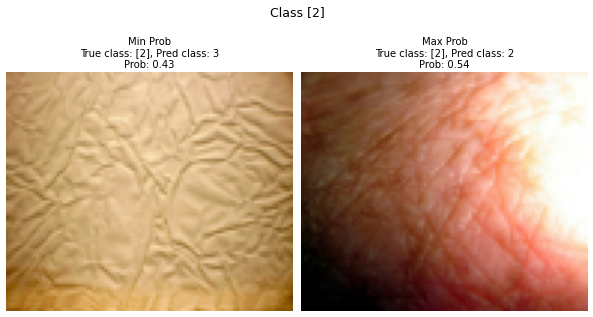

4/4 [==============================] - 0s 74ms/step


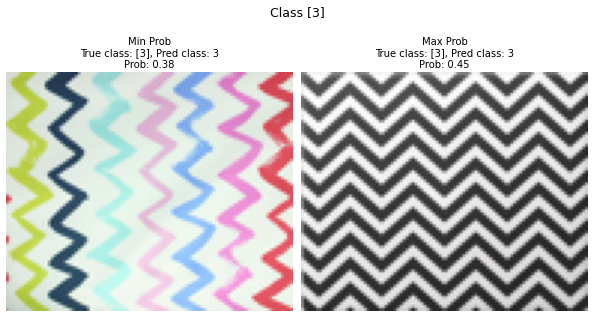

In [ ]:
def visualize(model, test_images, test_labels, class_index, dpi=60):
    predictions = model.predict(test_images)
    class_probabilities = predictions[:, class_index]
    max_index = np.argmax(class_probabilities * (test_labels[:, class_index] == 1))
    min_index = np.argmin(class_probabilities * (test_labels[:, class_index] == 1) + np.inf * (test_labels[:, class_index] == 0))
    plt.figure(figsize=(10, 5), dpi=dpi)
    plt.suptitle(f"Class {class_index}", y=1.05, fontsize=15)

    min_image = test_images[min_index]
    min_pred_class = np.argmax(predictions[min_index])
    plt.subplot(1, 2, 1)
    plt.imshow(min_image)
    plt.title(f"Min Prob\nTrue class: {class_index}, Pred class: {min_pred_class}\nProb: {predictions[min_index][min_pred_class]:.2f}")
    plt.axis('off')

    max_image = test_images[max_index]
    max_pred_class = np.argmax(predictions[max_index])
    plt.subplot(1, 2, 2)
    plt.imshow(max_image)
    plt.title(f"Max Prob\nTrue class: {class_index}, Pred class: {max_pred_class}\nProb: {predictions[max_index][max_pred_class]:.2f}")
    plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

classes = [0, 1, 2, 3]
for class_index in classes:
    visualize(model_rnn, test_images, test_labels, [class_index])